In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv',error_bad_lines=False)
df

,Hour,happy
0,More than five,yes
1,More than five,yes
2,More than five,yes
3,More than five,yes
4,less than two,no
...,...,...
95,More than two,yes
96,less than two,no
97,less than two,no
98,More than two,no


In [45]:
df.isnull().sum()

Hour     0
happy    0
dtype: int64

In [46]:
df['happy'].value_counts()

yes    57
no     43
Name: happy, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

X = df['Hour']  
y = df['happy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [49]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(80, 5)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) 
X_train_tfidf.shape

(80, 5)

In [51]:
y_test.shape, X_test.shape,X_train.shape,y_train.shape

((20,), (20,), (80,), (80,))

KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train_tfidf,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [53]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', KNeighborsClassifier()),
])
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,

[[ 6  1]
 [ 2 11]]
              precision    recall  f1-score   support

          no       0.75      0.86      0.80         7
         yes       0.92      0.85      0.88        13

    accuracy                           0.85        20
   macro avg       0.83      0.85      0.84        20
weighted avg       0.86      0.85      0.85        20

0.85


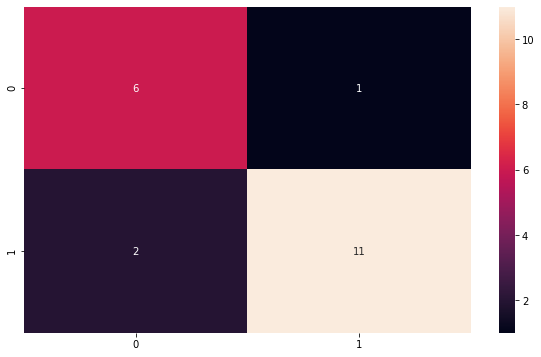

In [54]:
predictions = text_clf.predict(X_test)
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

random forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_tfidf,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',RandomForestClassifier()),
])
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

[[ 6  1]
 [ 2 11]]
              precision    recall  f1-score   support

          no       0.75      0.86      0.80         7
         yes       0.92      0.85      0.88        13

    accuracy                           0.85        20
   macro avg       0.83      0.85      0.84        20
weighted avg       0.86      0.85      0.85        20

0.85


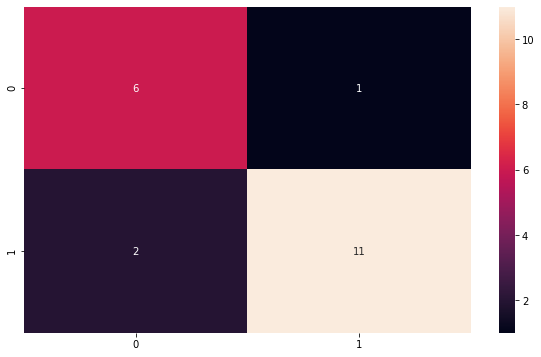

In [58]:
predictions = text_clf.predict(X_test)
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

sgd

In [59]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train_tfidf,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',SGDClassifier()),
])
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
           

[[ 6  1]
 [ 2 11]]
              precision    recall  f1-score   support

          no       0.75      0.86      0.80         7
         yes       0.92      0.85      0.88        13

    accuracy                           0.85        20
   macro avg       0.83      0.85      0.84        20
weighted avg       0.86      0.85      0.85        20

0.85


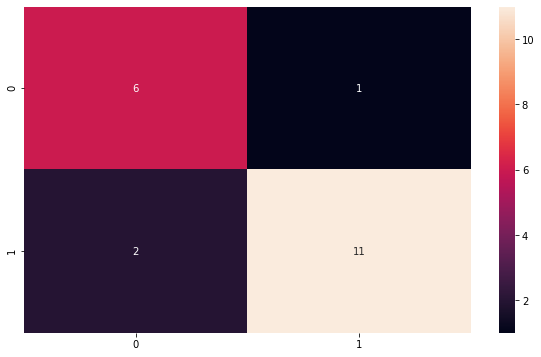

In [62]:
predictions = text_clf.predict(X_test)
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))